IMDB 데이터 셋
- 영어로 된 영화 리뷰에 대한 긍정(1)/부정(0) 데이터(25000개로 구성)
- 사전에 전처리가 된 데이터 (토큰화, 인코딩)

In [1]:
from tensorflow.keras.datasets import imdb

#학습에 사용할 단어의 수(특징의 수)
max_features=10000

(X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=max_features)

In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [3]:
#초기화 설정
import numpy as np
import tensorflow as tf

seed=9
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
import pandas as pd
pd.Series(y_train).unique()

array([1, 0], dtype=int64)

In [5]:
# 첫 번째 응답의 인덱스
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [6]:
# y의 라벨의 개수
pd.Series(y_train).value_counts()

1    12500
0    12500
dtype: int64

In [7]:
from tensorflow.keras.preprocessing import sequence
# 신경망에 텍스트 데이터 넣기 위해 같은 길이로 잘라줌
# 사용할 문자의 수(댓글의 길이)
len_word=500

#댓글을 len_word 길이로 잘라줌
X_train_seq = sequence.pad_sequences(X_train,maxlen=len_word)
X_test_seq = sequence.pad_sequences(X_test,maxlen=len_word)

In [8]:
X_train_seq.shape, X_test_seq.shape

((25000, 500), (25000, 500))

Embedding 층 : 텍스트를 다차원 벡터 공간상에 배치하는 기능(단어 사전을 만듬)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten

model=Sequential()

#Embedding(단어사전의 크기(전체단어수,출력수),
#          embedding차원(단어가 몇개의 단어와 연결되는지 설정), 
#          입력문자수(입력크기))
model.add(Embedding(max_features,32,input_length=len_word))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                512032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 832,065
Trainable params: 832,065
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["acc"])

In [11]:
h=model.fit(X_train_seq,y_train,epochs=10,batch_size=50,
           validation_data=(X_test_seq,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
493/500 [============================>.] - ETA: 0s - loss: 0.4695 - acc: 0.7338WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000244874767B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

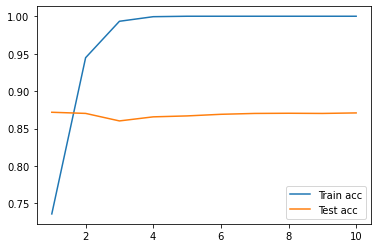

In [12]:
import matplotlib.pyplot as plt
epoch=range(1,11)

plt.plot(epoch,h.history["acc"],label="Train acc")
plt.plot(epoch,h.history["val_acc"],label="Test acc")
plt.legend()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten,SimpleRNN

model2=Sequential()

#Embedding(단어사전의 크기(전체단어수,출력수),
#          embedding차원(단어가 몇개의 단어와 연결되는지 설정), 
#          입력문자수(입력크기))
model2.add(Embedding(max_features,32,input_length=len_word))

model2.add(SimpleRNN(32))

#RNN은 출력이 1차원으로 나오므로 Flatten()이 필요없다
model2.add(Dense(32,activation="relu"))

model2.add(Dense(1,activation="sigmoid"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 323,169
Trainable params: 323,169
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["acc"])

In [17]:
h2=model2.fit(X_train_seq,y_train,epochs=10,batch_size=50,
           validation_data=(X_test_seq,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
500/500 [==============================] - ETA: 0s - loss: 0.6004 - acc: 0.6420WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000244BDEB2048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

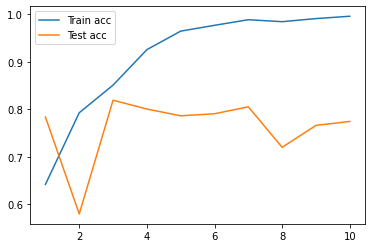

In [18]:
import matplotlib.pyplot as plt
epoch=range(1,11)

plt.plot(epoch,h2.history["acc"],label="Train acc")
plt.plot(epoch,h2.history["val_acc"],label="Test acc")
plt.legend()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten,LSTM
model3=Sequential()

#Embedding(단어사전의 크기(전체단어수,출력수),
#          embedding차원(단어가 몇개의 단어와 연결되는지 설정), 
#          입력문자수(입력크기))
model3.add(Embedding(max_features,32,input_length=len_word))

model3.add(LSTM(32))
#RNN은 출력이 1차원으로 나오므로 Flatten()이 필요없다
model3.add(Dense(32,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 329,409
Trainable params: 329,409
Non-trainable params: 0
________________________________________________

In [24]:
model3.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["acc"])

In [25]:
h3=model3.fit(X_train_seq,y_train,epochs=10,batch_size=50,
           validation_data=(X_test_seq,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
499/500 [============================>.] - ETA: 0s - loss: 0.4313 - acc: 0.7953WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000244AD609488> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

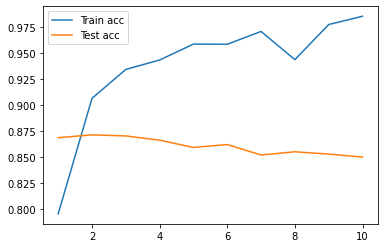

In [26]:
import matplotlib.pyplot as plt
epoch=range(1,11)

plt.plot(epoch,h3.history["acc"],label="Train acc")
plt.plot(epoch,h3.history["val_acc"],label="Test acc")
plt.legend()